In [1]:
import numpy as np
import matplotlib.pyplot as plt

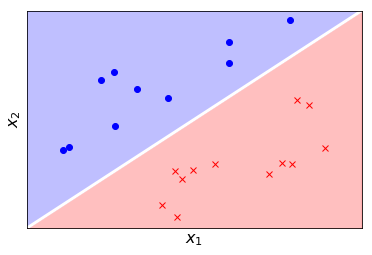

In [2]:
## linear
def y(x):
    return x

plt.xlim(0, 1)
plt.ylim(0, 1)
positive_noise = np.random.normal(0.3, 0.1, 15)
negative_noise = np.random.normal(-0.3, 0.1, 15)
positive_X = np.random.uniform(size=15)
negative_X = np.random.uniform(size=15)
X = np.linspace(0, 1, 30)
plt.plot(X, y(X), lw=3, color='w')
plt.plot(positive_X, y(positive_X) + positive_noise, 'bo')
plt.plot(negative_X, y(negative_X) + negative_noise, 'rx')
plt.fill_between(X, y(X), 1, color='b', alpha=0.25)
plt.fill_between(X, y(X), 0, color='r', alpha=0.25)
plt.yticks([])
plt.xticks([])
plt.xlabel(r'$x_1$', size=16)
plt.ylabel(r'$x_2$', size=16)
plt.show()

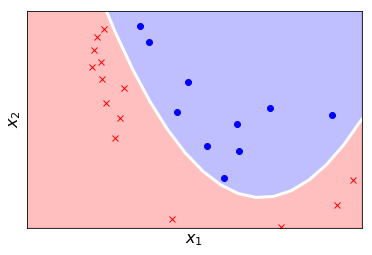

In [3]:
## quadratic
def y(x):
    return x ** 2 - 0.8 * x + 0.3

plt.xlim(-1, 1)
plt.ylim(0, 1)
positive_noise = np.random.normal(0.3, 0.1, 20)
negative_noise = np.random.normal(-0.3, 0.1, 20)
positive_X = 2 * np.random.uniform(size=20) - 1
negative_X = 2 * np.random.uniform(size=20) - 1
X = np.linspace(-1, 1, 20)
plt.plot(X, y(X), lw=3, color='w')
plt.plot(positive_X, y(positive_X) + positive_noise, 'bo')
plt.plot(negative_X, y(negative_X) + negative_noise, 'rx')
plt.fill_between(X, y(X), 1, color='b', alpha=0.25)
plt.fill_between(X, y(X), 0, color='r', alpha=0.25)
plt.yticks([])
plt.xticks([])
plt.xlabel(r'$x_1$', size=16)
plt.ylabel(r'$x_2$', size=16)
plt.show()

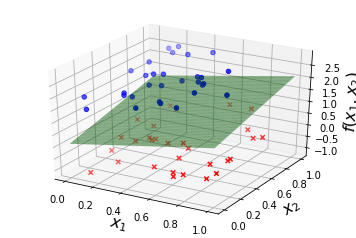

In [4]:
## hyperplane
from mpl_toolkits.mplot3d import Axes3D

def y(x1, x2):
    return x1 + x2 + 0.1

p_noise = np.random.normal(0.3, 0.1, 30)
n_noise = np.random.normal(-0.3, 0.1, 30)
p_x1, p_x2 = np.random.uniform(size=30), np.random.uniform(size=30)
n_x1, n_x2 = np.random.uniform(size=30), np.random.uniform(size=30)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='g', linewidth=0, alpha=0.5)
ax.scatter(p_x1, p_x2, y(p_x1, p_x2) + p_noise + 1, c='b', marker='o')
ax.scatter(n_x1, n_x2, y(n_x1, n_x2) + n_noise - 1, c='r', marker='x')

#ax.set_yticklabels([])
#ax.set_xticklabels([])
#ax.set_zticklabels([])
ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)
ax.set_zlabel(r"$f(x_1, x_2)$", size=16)
plt.show()

In [5]:
## decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

rawdata = np.loadtxt('german_credit.csv', delimiter=',', dtype=str)
feature_names = rawdata[0][1:]
X, y = np.array(rawdata[1:, 1:], dtype=np.float32), np.array(rawdata[1:, 0],np.int32)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=['bad', 'good'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

ImportError: No module named 'graphviz'

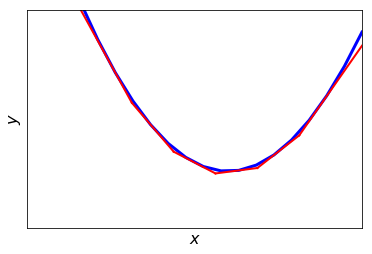

In [6]:
## linear mixture
def y(x):
    return x**2 - 0.4 * x + 0.3
 
plt.xlim(-1, 1)
plt.ylim(0, 1)

X = np.linspace(-1, 1, 20)
plt.plot(X, y(X), lw=3, color='b')

line1_x = np.linspace(-0.75, -0.375, 20)
line1_y = -1.4 * line1_x + 0.05
plt.plot(line1_x, line1_y, lw=2, color='r')

line2_x = np.linspace(-0.375, -0.125, 20)
line2_y = -0.9 * line2_x + 0.2375
plt.plot(line2_x, line2_y, lw=2, color='r')

line3_x = np.linspace(-0.125, 0.125, 20)
line3_y = -0.4 * line3_x + 0.3
plt.plot(line3_x, line3_y, lw=2, color='r')

line4_x = np.linspace(0.125, 0.375, 20)
line4_y = 0.1 * line4_x + 0.2375
plt.plot(line4_x, line4_y, lw=2, color='r')

line5_x = np.linspace(0.375, 0.625, 20)
line5_y = 0.6 * line5_x + 0.05
plt.plot(line5_x, line5_y, lw=2, color='r')

line6_x = np.linspace(0.625, 1, 20)
line6_y = 1.1 * line6_x - 0.2625
plt.plot(line6_x, line6_y, lw=2, color='r')

plt.yticks([])
plt.xticks([])
plt.xlabel(r'$x$', size=16)
plt.ylabel(r'$y$', size=16)
plt.show()

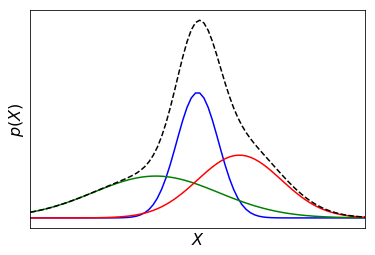

In [16]:
## guassian mixture
from scipy.stats import norm
plt.xlim(-4, 4)

X = np.linspace(-5, 5, 100)
rv1 = norm(loc = 0, scale = .5)
p1 = rv1.pdf(X)
rv2 = norm(loc = -1, scale = 1.5)
p2 = rv2.pdf(X)
rv3 = norm(loc = 1, scale = 1)
p3 = rv3.pdf(X)

p4 = p1 + p2 + p3

plt.plot(X, p1, 'b')
plt.plot(X, p2, 'g')
plt.plot(X, p3, 'r')
plt.plot(X, p4, 'k--')
plt.yticks([])
plt.xticks([])
plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$p(X)$', size=16)
plt.show()